In [1]:
#Model notebook

## This is the notebook for model in age gender detector. here, we will extract the data, train it into our model, and evaluate our results and optimize the model for better results.

In [2]:
!pip install opencv-python

In [3]:
!pip install --upgrade tensorflow

In [4]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [5]:
##If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [6]:
fldr = 'C:/Users/shour/agegender_detector/UTKFace'

In [7]:
!pip install tensorflow

In [8]:
import os
files=os.listdir(fldr)

In [9]:
##create list of images from the data set


In [10]:
import os

labels_f = [filename.split('_')[0] for filename in os.listdir('C:/Users/shour/agegender_detector/UTKFace')]

In [11]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)
    

C:/Users/shour/agegender_detector/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:/Users/shour/agegender_detector/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
C:/Users/shour/agegender_det

In [12]:
##Create list of age and gender grom the dataset

In [13]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)
    

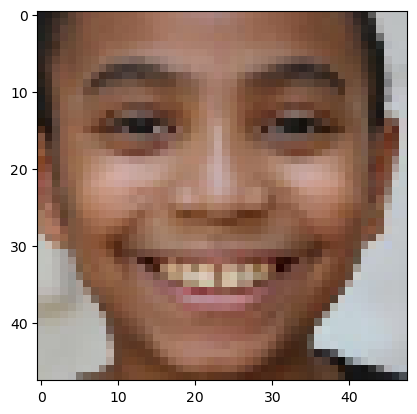

In [14]:
plt.imshow(images[87])

In [15]:
print(ages[87])

10


In [16]:
print(genders[87])

0


In [17]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [18]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [19]:
##Finding the no. of elements in dtasets

In [20]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


In [21]:
##Plotting the no. of Males and Females samples

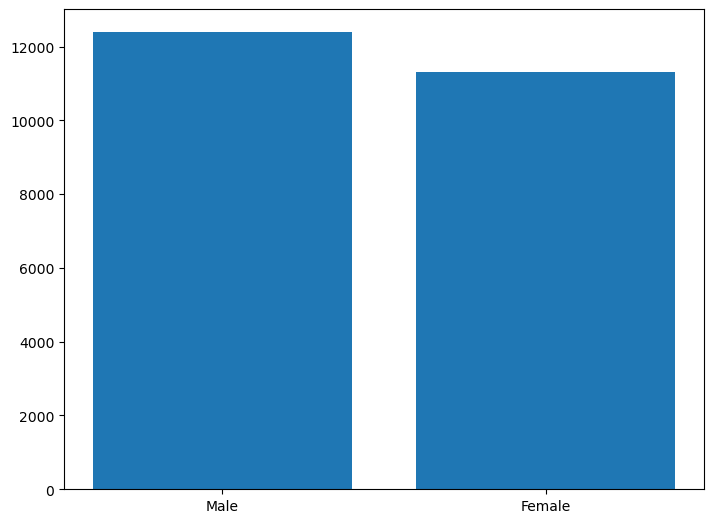

In [22]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [23]:
## Finding the no. of samples in each age

In [24]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [25]:
##Converting Age counts to lists

In [26]:
val=values.tolist()
cnt=counts.tolist()

In [27]:
## Plotting samples agewise.

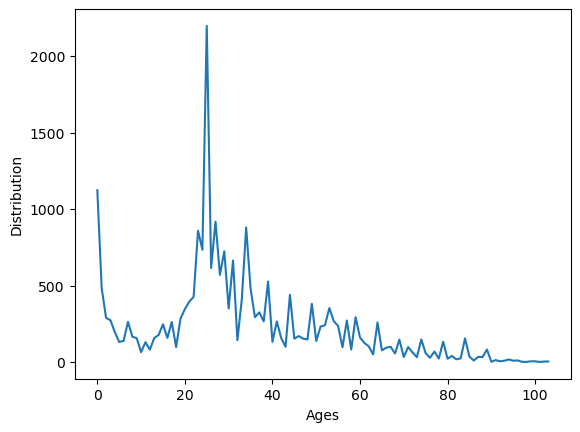

In [28]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [29]:
## Defining labels for output

In [30]:
len(genders)

23708

In [31]:
print(len(ages))

23708


In [32]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [33]:
print(len(labels))

23708


In [34]:
print(labels)

[[100, 0], [100, 0], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [101, 0], [101, 1], [103, 0], [105, 0], [105, 1], [105, 1], [105, 1], [105, 1], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0],

In [35]:
## Creating another list of images from existing one
### For better learning

In [36]:
images_f_2=images_f/255

In [37]:
images_f_2.shape

(23708, 48, 48, 3)

In [38]:
labels_f=np.array(labels)

In [39]:
## Splitting the Datasets into test and train

In [40]:
 import sklearn

In [41]:
from sklearn. model_selection import train_test_split

In [42]:
print("Shape of images_f_2:", images_f_2.shape)
print("Shape of labels_f:", labels_f.shape)

Shape of images_f_2: (23708, 48, 48, 3)
Shape of labels_f: (23708, 2)


In [43]:
print(labels_f[:10])  # Print the first 10 elements of labels_f

[[100   0]
 [100   0]
 [100   1]
 [100   1]
 [100   1]
 [100   1]
 [100   1]
 [100   1]
 [100   1]
 [100   1]]


In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [45]:
Y_train[0:5]

array([[56,  1],
       [45,  0],
       [46,  0],
       [20,  1],
       [27,  1]])

In [46]:
## Splitting 'Y_test' and 'Y_train' Further 
### For better understanding

In [47]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [48]:
Y_train_2[0][0:5]

array([1, 0, 0, 1, 1])

In [49]:
Y_train_2[1][0:5]

array([56, 45, 46, 20, 27])

In [50]:
#Defining the model

In [51]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [52]:
from tensorflow.keras.models import Model as KerasModel

def model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = KerasModel(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [130]:
Model = model((48, 48, 3))

In [54]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the Model
### This will take some time

In [56]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weight_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the Model
###

In [57]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 16.5817 - sex_out_loss: 0.6941 - age_out_loss: 15.6982 - sex_out_accuracy: 0.5269 - age_out_accuracy: 0.0468
Epoch 1: val_loss improved from inf to 16.57907, saving model to Age_Sex_Detection.h5


c:\Users\shour\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 59s 186ms/step - loss: 16.5817 - sex_out_loss: 0.6941 - age_out_loss: 15.6982 - sex_out_accuracy: 0.5269 - age_out_accuracy: 0.0468 - val_loss: 16.5791 - val_sex_out_loss: 0.6926 - val_age_out_loss: 15.7082 - val_sex_out_accuracy: 0.5180 - val_age_out_accuracy: 0.0483
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.2743 - sex_out_loss: 0.6383 - age_out_loss: 12.4184 - sex_out_accuracy: 0.6061 - age_out_accuracy: 0.0459
Epoch 2: val_loss improved from 16.57907 to 13.83514, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 43s 156ms/step - loss: 13.2743 - sex_out_loss: 0.6383 - age_out_loss: 12.4184 - sex_out_accuracy: 0.6061 - age_out_accuracy: 0.0459 - val_loss: 13.8351 - val_sex_out_loss: 0.5807 - val_age_out_loss: 13.0037 - val_sex_out_accuracy: 0.7201 - val_age_out_accuracy: 0.0450
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 11.3712 - sex_out_loss: 0.5615 - a

In [58]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 4s 17ms/step - loss: 7.7834 - sex_out_loss: 0.2530 - age_out_loss: 6.8592 - sex_out_accuracy: 0.8873 - age_out_accuracy: 0.0483


[7.783401966094971,
 0.25302770733833313,
 6.859224796295166,
 0.8872954249382019,
 0.048253752291202545]

In [59]:
pred=Model.predict(X_test)

186/186 [==============================] - 8s 17ms/step


In [60]:
pred[1]

array([[ 5.2076674],
       [19.716179 ],
       [49.765293 ],
       ...,
       [32.5412   ],
       [33.757603 ],
       [28.255676 ]], dtype=float32)

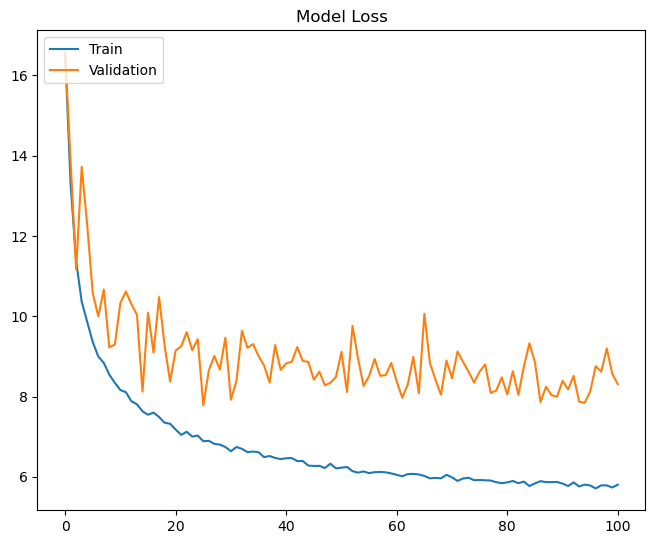

In [67]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

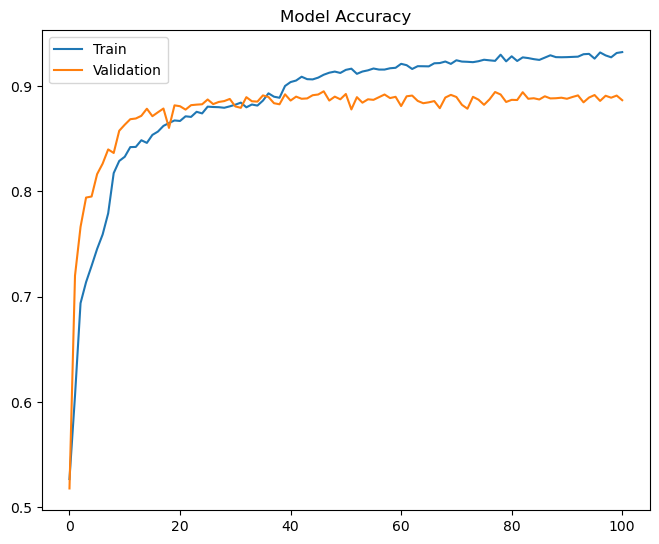

In [76]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

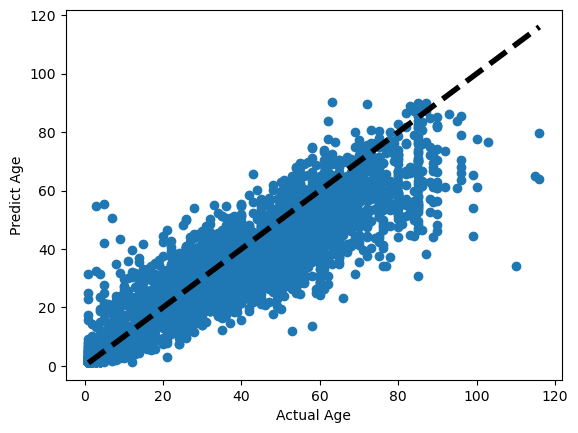

In [90]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predict Age')
plt.show()

In [93]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
report=classification_report(Y_test_2[0],Pred_l)

In [96]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3070
           1       0.88      0.89      0.88      2857

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [98]:
!pip install seaborn

In [106]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

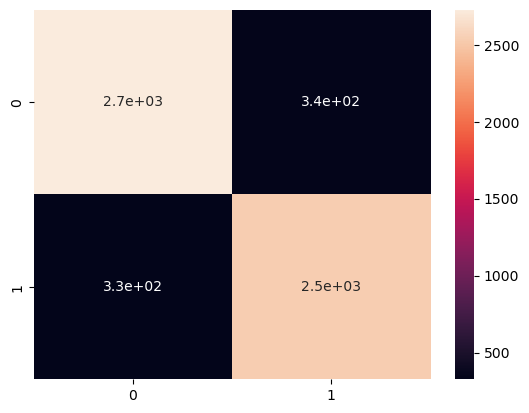

In [107]:
import seaborn as sns
sns.heatmap(results,annot=True)

##Testing the Images Ourself

In [117]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("predicted Age is"+str(age))
    print("predicted Gender is"+ sex_f[sex])


### Test 1

1/1 [==============================] - 1s 1s/step
predicted Age is82
predicted Gender isFemale


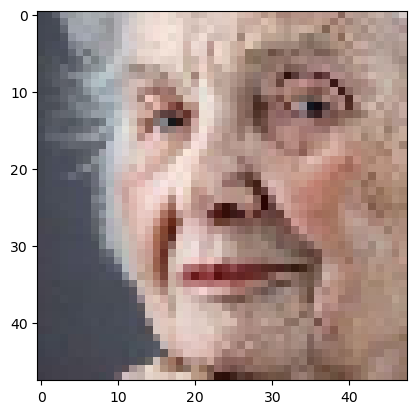

In [118]:
test_image(4,images_f,images_f_2,Model)

#Tset 2

1/1 [==============================] - 0s 94ms/step
predicted Age is88
predicted Gender isMale


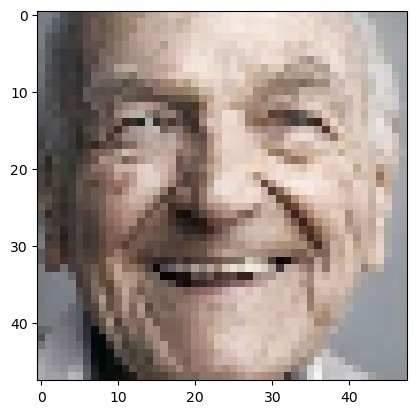

In [122]:
test_image(1,images_f,images_f_2,Model)

#Test3

1/1 [==============================] - 0s 234ms/step
predicted Age is10
predicted Gender isFemale


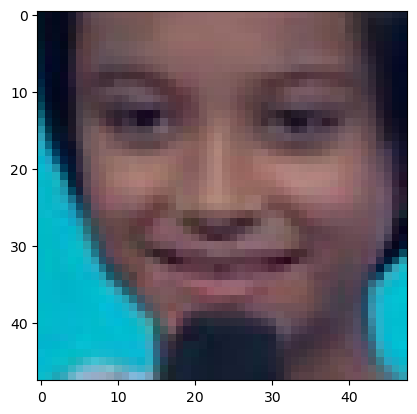

In [123]:
test_image(168,images_f,images_f_2,Model)

#Test4

1/1 [==============================] - 1s 861ms/step
predicted Age is25
predicted Gender isMale


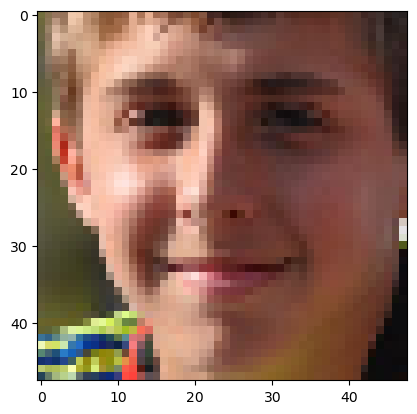

In [124]:
test_image(888,images_f,images_f_2,Model)

#Test 5

1/1 [==============================] - 1s 608ms/step
predicted Age is25
predicted Gender isFemale


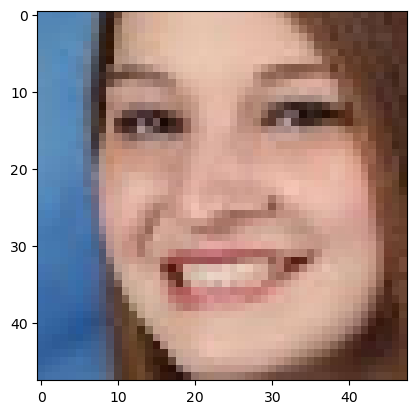

In [125]:
test_image(1288,images_f,images_f_2,Model)